In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [2]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [3]:
model.add(keras.layers.MaxPooling2D(2))

In [4]:
model.add(keras.layers.Conv2D(62, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [5]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 62)        17918     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 62)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3038)              0         
                                                                 
 dense (Dense)               (None, 100)               3

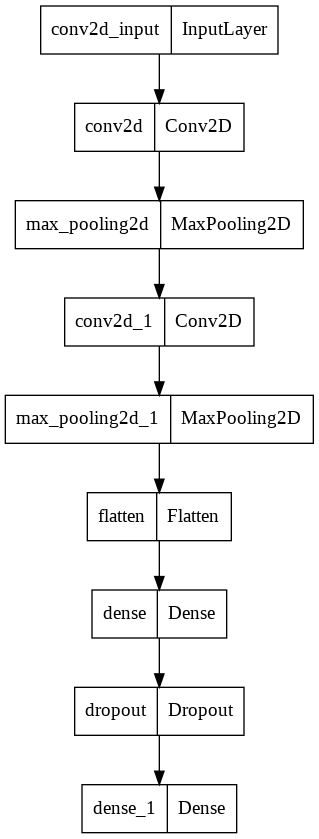

In [7]:
keras.utils.plot_model(model)

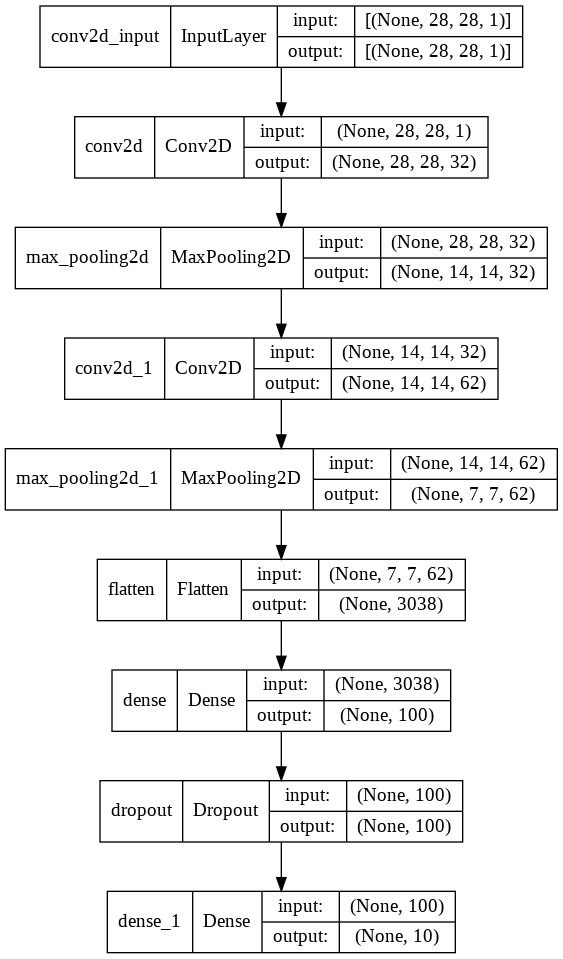

In [8]:
keras.utils.plot_model(model, show_shapes=True)

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 65s 43ms/step - loss: 0.5161 - accuracy: 0.8179 - val_loss: 0.3475 - val_accuracy: 0.8698
Epoch 2/20
1500/1500 [==============================] - 56s 38ms/step - loss: 0.3422 - accuracy: 0.8769 - val_loss: 0.2869 - val_accuracy: 0.8943
Epoch 3/20
1500/1500 [==============================] - 56s 37ms/step - loss: 0.2941 - accuracy: 0.8926 - val_loss: 0.2612 - val_accuracy: 0.9030
Epoch 4/20
1500/1500 [==============================] - 55s 37ms/step - loss: 0.2614 - accuracy: 0.9051 - val_loss: 0.2367 - val_accuracy: 0.9142
Epoch 5/20
1500/1500 [==============================] - 55s 37ms/step - loss: 0.2389 - accuracy: 0.9126 - val_loss: 0.2295 - val_accuracy: 0.9172
Epoch 6/20
1500/1500 [==============================] - 55s 37ms/step - loss: 0.2148 - accuracy: 0.9199 - val_loss: 0.2307 - val_accuracy: 0.9143
Epoch 7/20
1500/1500 [==============================] - 55s 37ms/step - loss: 0.1971 - accuracy: 0.9275 - val_loss: 0.2313 -

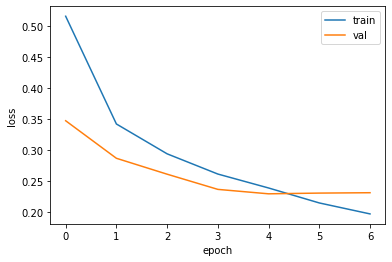

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [11]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 4s 10ms/step - loss: 0.2295 - accuracy: 0.9172


[0.22952021658420563, 0.9172499775886536]

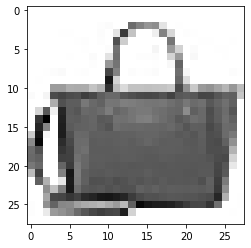

In [12]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [13]:
preds = model.predict(val_scaled[0:1])
print(preds)

[[3.1770434e-14 2.8212155e-20 6.2407886e-18 3.4030277e-17 4.7982035e-14
  5.6359997e-17 1.8588339e-15 8.3875425e-14 1.0000000e+00 2.6164594e-16]]


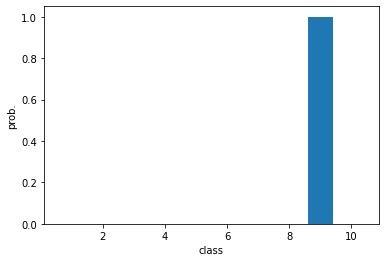

In [14]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [15]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [16]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [17]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [18]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 3s 10ms/step - loss: 0.2503 - accuracy: 0.9100


[0.25033891201019287, 0.9100000262260437]

In [19]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')

In [20]:
model.layers

In [21]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [22]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.008156103 0.18685132


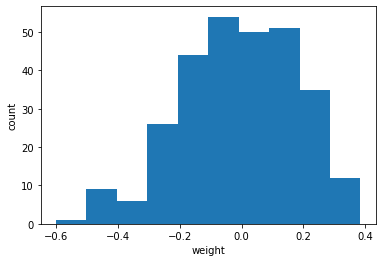

In [23]:
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

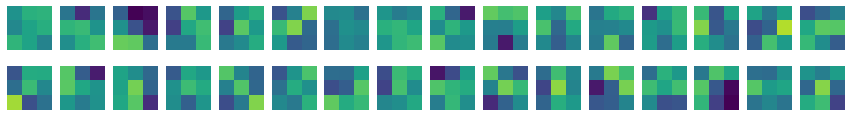

In [24]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:, :, 0, i * 16 + j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')
plt.show()

In [25]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [26]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [27]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

0.0013930968 0.08348252


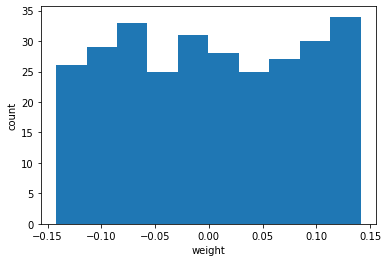

In [28]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

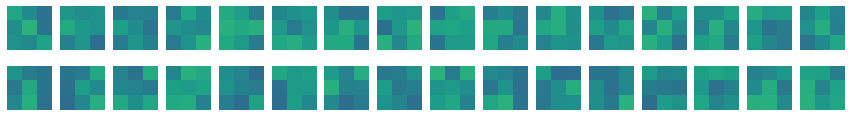

In [29]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(no_training_weights[:, :, 0, i * 16 + j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')
plt.show()

In [30]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [31]:
conv_acti = keras.Model(model.input, model.layers[0].output)

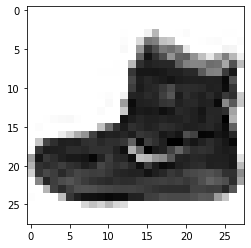

In [32]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [33]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

In [34]:
print(feature_maps.shape)

(1, 28, 28, 32)


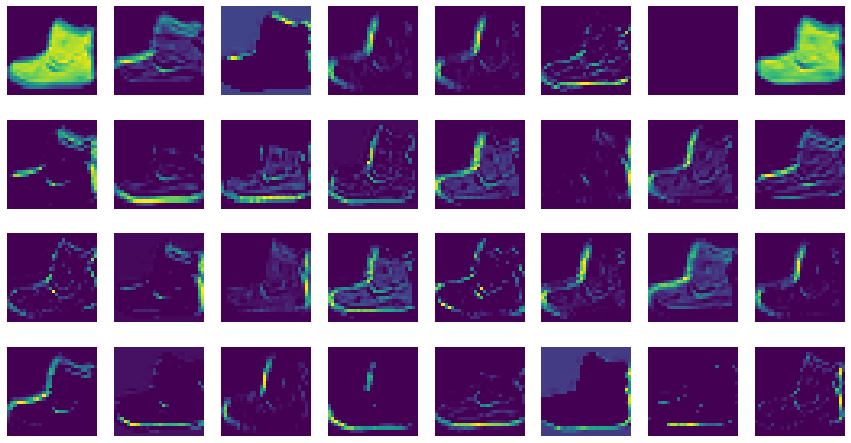

In [35]:
fig, axs = plt.subplots(4, 8, figsize=(15, 8))
for i in range(4):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0, :, :, i * 8 + j])
    axs[i, j].axis('off')
plt.show()

In [36]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [37]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv2_acti.predict(inputs)

In [38]:
print(feature_maps.shape)

(1, 14, 14, 62)


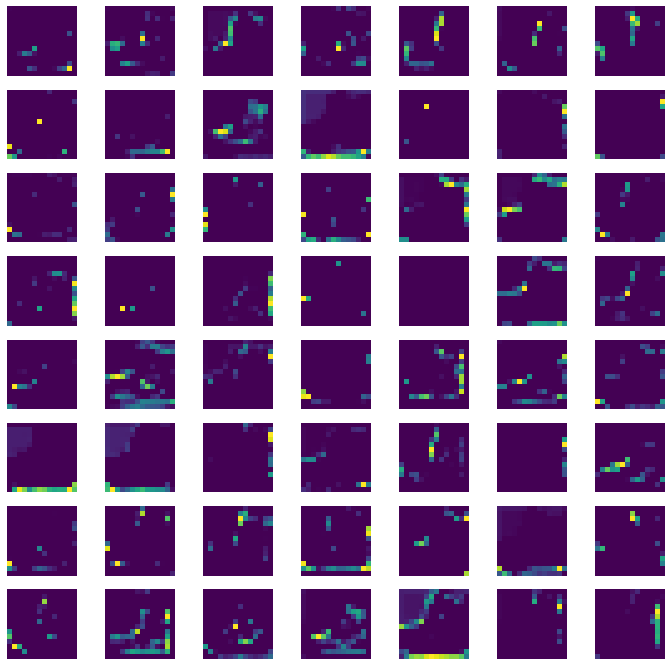

In [41]:
fig, axs = plt.subplots(8, 7, figsize=(12, 12))
for i in range(8):
  for j in range(7):
    axs[i, j].imshow(feature_maps[0, :, :, i * 7 + j])
    axs[i, j].axis('off')
plt.show()